### 前景擷取與影像修復

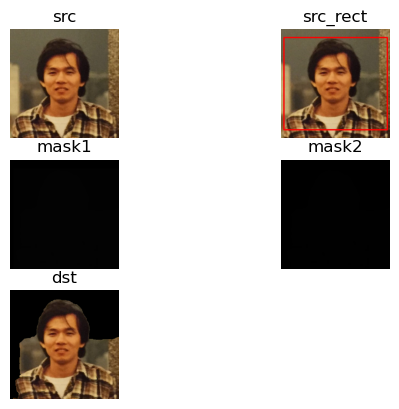

In [2]:
# grabCut()
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('hung.jpg')
cv2.imshow('src', src)
plt.subplot(321) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (10, 30, 380, 360)                       # 建立ROI區域
src_rect = src.copy()
cv2.rectangle(src_rect, rect[0:2], rect[2:4], (0, 0, 255), 3)
cv2.imshow('Rectangle', src_rect)
plt.subplot(322) 
plt.imshow(cv2.cvtColor(src_rect, cv2.COLOR_BGR2RGB))
plt.title('src_rect')
plt.axis('off')

# 呼叫grabCut()進行分割, 迭代 3 次,回傳mask1
# 其實mask1 = mask, 因為mask也會同步更新
mask1, bgd, fgd = cv2.grabCut(src, mask, rect, bgdModel, fgdModel, 3,
                              cv2.GC_INIT_WITH_RECT)
cv2.imshow('mask1', mask1)
plt.subplot(323) 
plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
plt.title('mask1')
plt.axis('off')

# 將 0, 2設為0 --- 1, 3設為1
mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype('uint8')
cv2. imshow('mask2', mask2)
plt.subplot(324) 
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.title('mask2')
plt.axis('off')

dst = src * mask2[:, :, np.newaxis]                 # 計算輸出影像
cv2.imshow('dst', dst)
plt.subplot(325) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

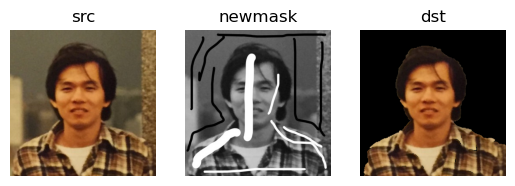

In [1]:
# grabCut()
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('hung.jpg')
cv2.imshow('src', src)
plt.subplot(131) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (10, 30, 380, 360)                       # 建立ROI區域

# 呼叫grabCut()進行分割
cv2.grabCut(src, mask, rect, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_RECT)
newmask = cv2.imread('hung_mask.jpg', cv2.IMREAD_GRAYSCALE) # 灰階讀取
cv2.imshow('newmask', newmask)
plt.subplot(132) 
plt.imshow(cv2.cvtColor(newmask, cv2.COLOR_BGR2RGB))
plt.title('newmask')
plt.axis('off')
mask[newmask == 0] = 0                          # 白色內容則確定是前景
mask[newmask == 255] = 1                        # 黑色內容則確定是背景
cv2.grabCut(src, mask, None, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_MASK)

# 將 0, 2設為0 --- 1, 3設為1
mask = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask[:, :, np.newaxis]                 # 計算輸出影像
cv2.imshow('dst', dst)
plt.subplot(133) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

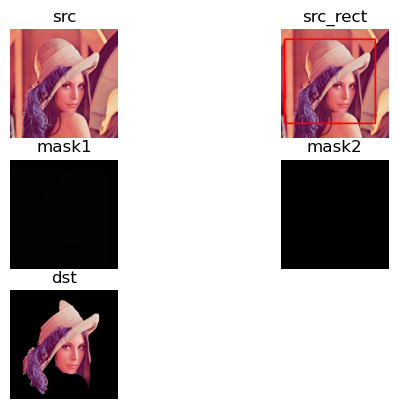

In [2]:
# 自定義遮罩
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('lena.jpg')
cv2.imshow('src', src)
plt.subplot(321) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (10, 30, 280, 280)                       # 建立ROI區域
src_rect = src.copy()
cv2.rectangle(src_rect, rect[0:2], rect[2:4], (0, 0, 255), 3)
cv2.imshow('Rectangle', src_rect)
plt.subplot(322) 
plt.imshow(cv2.cvtColor(src_rect, cv2.COLOR_BGR2RGB))
plt.title('src_rect')
plt.axis('off')

# 呼叫grabCut()進行分割, 迭代 3 次,回傳mask1
# 其實mask1 = mask, 因為mask也會同步更新
mask1, bgd, fgd = cv2.grabCut(src, mask, rect, bgdModel, fgdModel, 3,
                              cv2.GC_INIT_WITH_RECT)
cv2.imshow('mask1', mask1)
plt.subplot(323) 
plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
plt.title('mask1')
plt.axis('off')

# 將 0, 2設為0 --- 1, 3設為1
mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype('uint8')
cv2. imshow('mask2', mask2)
plt.subplot(324) 
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.title('mask2')
plt.axis('off')

dst = src * mask2[:, :, np.newaxis]                 # 計算輸出影像
cv2.imshow('dst', dst)
plt.subplot(325) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

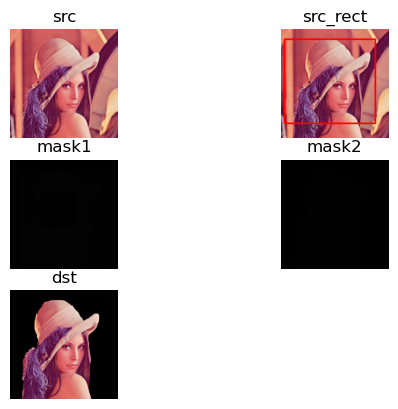

In [1]:
# 自定義遮罩
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('lena.jpg')
cv2.imshow('src', src)
plt.subplot(321) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
mask[30:324, 30:300] = 3                        # 定義可能前景區域
mask[90:200, 90:200] = 1                        # 定義確定前景區域
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (10, 30, 280, 280)                       # 建立ROI區域
src_rect = src.copy()
cv2.rectangle(src_rect, rect[0:2], rect[2:4], (0, 0, 255), 3)
cv2.imshow('Rectangle', src_rect)
plt.subplot(322) 
plt.imshow(cv2.cvtColor(src_rect, cv2.COLOR_BGR2RGB))
plt.title('src_rect')
plt.axis('off')

# 呼叫grabCut()進行分割, 迭代 3 次,回傳mask1
# 其實mask1 = mask, 因為mask也會同步更新
mask1, bgd, fgd = cv2.grabCut(src, mask, None, bgdModel, fgdModel, 3,
                              cv2.GC_INIT_WITH_MASK)
cv2.imshow('mask1', mask1)
plt.subplot(323) 
plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
plt.title('mask1')
plt.axis('off')

# 將 0, 2設為0 --- 1, 3設為1
mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype('uint8')
cv2. imshow('mask2', mask2)
plt.subplot(324) 
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
plt.title('mask2')
plt.axis('off')

dst = src * mask2[:, :, np.newaxis]                 # 計算輸出影像
cv2.imshow('dst', dst)
plt.subplot(325) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

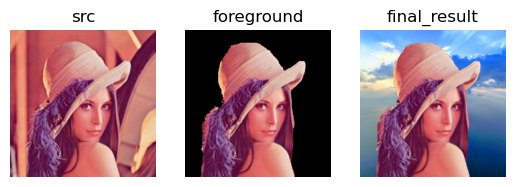

In [2]:
# 前景擷取-更換影像背景
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取影像和背景影像
src = cv2.imread('lena.jpg')                    # 讀取人物影像
background = cv2.imread('bk1.jpg')              # 讀取背景影像

# 確保背景影像的大小與人物影像相同
background = cv2.resize(background, (src.shape[1], src.shape[0]))
# 建立內部用的 GrabCut 模型
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (30, 30, 280, 280)                       # 建立ROI區域
mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
mask[30:324, 30:300] = 3                        # 不確定區域(GC_PR_BGD)
mask[90:200, 90:200] = 1                        # 定義確定前景區域(GC_FGD)

# 呼叫grabCut()進行分割, 迭代 3 次,回傳mask1
# 其實mask1 = mask, 因為mask也會同步更新
mask1, bgd, fgd = cv2.grabCut(
    src, mask, None, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_MASK)
# 將標記轉換為前景和背景的二值掩膜, 前景為1
mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype('uint8')
# 提取前景
foreground = src * mask2[:, :, np.newaxis]
# 替換背景
final_result = background * (1 - mask2[:, :, np.newaxis]) + foreground                # 計算輸出影像
# 顯示結果
cv2.imshow('src', src)
cv2.imshow('foreground', foreground)
cv2.imshow('final_result', final_result)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

plt.subplot(132) 
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('foreground')
plt.axis('off')

plt.subplot(133) 
plt.imshow(cv2.cvtColor( final_result, cv2.COLOR_BGR2RGB))
plt.title('final_result')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

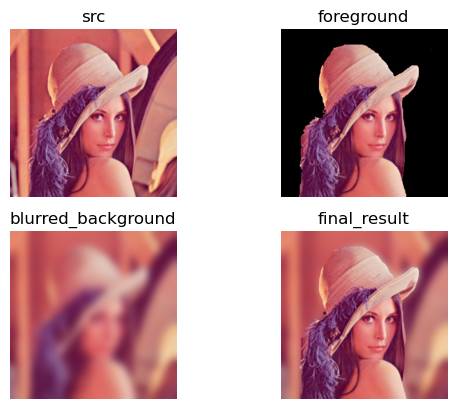

In [1]:
# 前景擷取-模糊影像背景
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取影像和背景影像
src = cv2.imread('lena.jpg')                    # 讀取人物影像
background = cv2.imread('bk1.jpg')              # 讀取背景影像

# 確保背景影像的大小與人物影像相同
background = cv2.resize(background, (src.shape[1], src.shape[0]))
# 建立內部用的 GrabCut 模型
bgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
fgdModel = np.zeros((1, 65), np.float64)        # 建立內部用暫時計算陣列
rect = (30, 30, 280, 280)                       # 建立ROI區域
mask = np.zeros(src.shape[:2], np.uint8)        # 建立遮罩, 大小和src相同
mask[30:324, 30:300] = 3                        # 不確定區域(GC_PR_BGD)
mask[90:200, 90:200] = 1                        # 定義確定前景區域(GC_FGD)

# 呼叫grabCut()進行分割, 迭代 3 次,回傳mask1
# 其實mask1 = mask, 因為mask也會同步更新
mask1, bgd, fgd = cv2.grabCut(
    src, mask, None, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_MASK)
# 將標記轉換為前景和背景的二值掩膜, 前景為1
mask2 = np.where((mask1 == 0) | (mask1 == 2), 0, 1).astype('uint8')
# 提取前景
foreground = src * mask2[:, :, np.newaxis]
# 創建模糊背景, 替換背景
blurred_background = cv2.GaussianBlur(src, (51, 51), 0) # 模糊背景
final_result = blurred_background * (1 - mask2[:, :, np.newaxis]) + foreground                # 計算輸出影像
# 顯示結果
cv2.imshow('src', src)
cv2.imshow('foreground', foreground)
cv2.imshow('blurred_background', blurred_background)
cv2.imshow('final_result', final_result)

plt.subplot(221) 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.axis('off')

plt.subplot(222) 
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('foreground')
plt.axis('off')

plt.subplot(223) 
plt.imshow(cv2.cvtColor(blurred_background, cv2.COLOR_BGR2RGB))
plt.title('blurred_background')
plt.axis('off')


plt.subplot(224) 
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.title('final_result')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

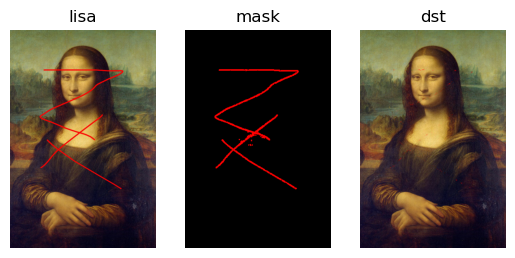

In [3]:
# 影像修復inpaint()
import cv2
from matplotlib import pyplot as plt
lisa = cv2.imread('lisaE1.jpg')
 # 以二值化偵測影像中的損壞區域
_, mask = cv2.threshold(lisa, 250, 255, cv2.THRESH_BINARY)
 # 對於剛才取得的遮罩做形態學處理 (擴展), 使得遮罩完全覆蓋損壞區域。
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, kernel)
 # 修復影像
dst = cv2.inpaint(lisa, mask[:, :, -1], 6, cv2.INPAINT_NS)
 # 輸出執行結果
cv2.imshow('lisa', lisa)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(lisa, cv2.COLOR_BGR2RGB))
plt.title('lisa')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

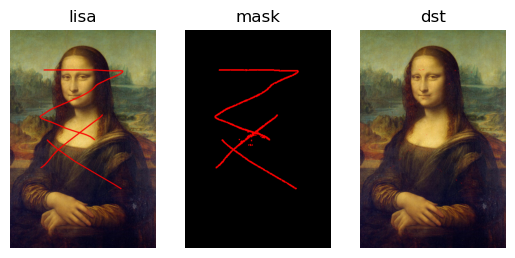

In [1]:
# 影像修復inpaint()
import cv2
from matplotlib import pyplot as plt
lisa = cv2.imread('lisaE1.jpg')
 # 以二值化偵測影像中的損壞區域
_, mask = cv2.threshold(lisa, 250, 255, cv2.THRESH_BINARY)
 # 對於剛才取得的遮罩做形態學處理 (擴展), 使得遮罩完全覆蓋損壞區域。
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, kernel)
 # 修復影像
dst = cv2.inpaint(lisa, mask[:, :, -1], 6, cv2.INPAINT_TELEA)
 # 輸出執行結果
cv2.imshow('lisa', lisa)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(lisa, cv2.COLOR_BGR2RGB))
plt.title('lisa')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

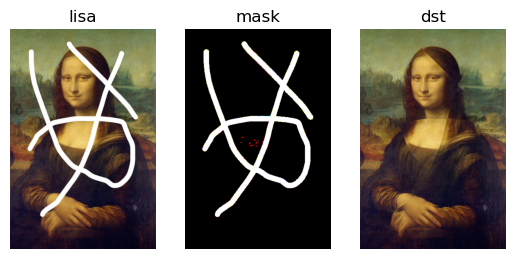

In [2]:
# 影像修復inpaint()
import cv2
from matplotlib import pyplot as plt
lisa = cv2.imread('lisaE2.jpg')
 # 以二值化偵測影像中的損壞區域
_, mask = cv2.threshold(lisa, 250, 255, cv2.THRESH_BINARY)
 # 對於剛才取得的遮罩做形態學處理 (擴展), 使得遮罩完全覆蓋損壞區域。
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, kernel)
 # 修復影像
dst = cv2.inpaint(lisa, mask[:, :, -1], 6, cv2.INPAINT_NS)
 # 輸出執行結果
cv2.imshow('lisa', lisa)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(lisa, cv2.COLOR_BGR2RGB))
plt.title('lisa')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

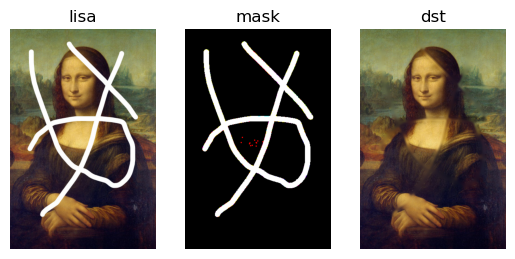

In [1]:
# 影像修復inpaint()
import cv2
from matplotlib import pyplot as plt
lisa = cv2.imread('lisaE2.jpg')
 # 以二值化偵測影像中的損壞區域
_, mask = cv2.threshold(lisa, 250, 255, cv2.THRESH_BINARY)
 # 對於剛才取得的遮罩做形態學處理 (擴展), 使得遮罩完全覆蓋損壞區域。
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, kernel)
 # 修復影像
dst = cv2.inpaint(lisa, mask[:, :, -1], 6, cv2.INPAINT_TELEA)
 # 輸出執行結果
cv2.imshow('lisa', lisa)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(lisa, cv2.COLOR_BGR2RGB))
plt.title('lisa')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('dst')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

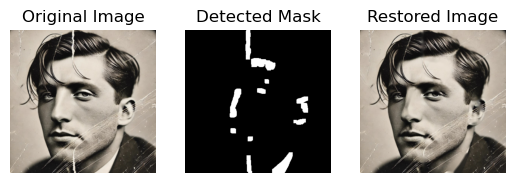

In [2]:
# 局部修復影像
import cv2
import matplotlib.pyplot as plt

 # 讀取受損圖像
img = cv2.imread('damaged_photo.jpg')
 # 將圖像轉換為灰階色彩
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 # 應用中值濾波以減少噪聲
denoised = cv2.medianBlur(gray, 5)
 # 檢測受損區域, 用自適應閾值分割檢測高亮區域 (可能的受損區域)
_, mask = cv2.threshold(denoised, 225, 255, cv2.THRESH_BINARY)
 # 透過形態學操作膨脹, 擴展受損區域, 以確保完全覆蓋
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask = cv2.dilate(mask, kernel, iterations=2)
 # 使用 inpaint 函數修復圖像
restored_img = cv2.inpaint(img, mask, inpaintRadius=5,
 flags=cv2.INPAINT_TELEA)
 # 顯示原始圖像、遮罩和修復後的圖像
cv2.imshow('Original Image', img)
cv2.imshow('Detected Mask', mask)
cv2.imshow('Restored Image', restored_img)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('Detected Mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
plt.title('Restored Image')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

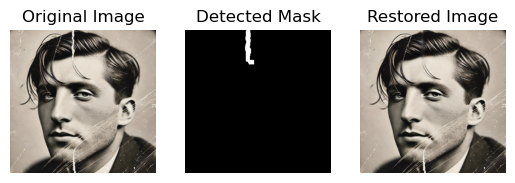

In [3]:
# 局部修復影像
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取受損圖像
img = cv2.imread('damaged_photo.jpg')
# 將圖像轉換為灰階色彩
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 創建與圖像大小相同的黑色遮罩
mask = np.zeros(img.shape[:2], dtype=np.uint8)
# 手動設定檢測區域, 矩形區域的座標
x1, y1, x2, y2 = 150, 1, 180, 90
# 取得矩形區域的灰階色彩
roi = gray[y1:y2, x1:x2]
# 在矩形區域內應用 threshold 函數
_, roi_mask = cv2.threshold(roi, 225, 255, cv2.THRESH_BINARY)
# 將處理後的遮罩放回到原遮罩的對應區域
mask[y1:y2, x1:x2] = roi_mask
# 透過形態學操作膨脹, 擴展受損區域, 以確保完全覆蓋
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask = cv2.dilate(mask, kernel, iterations=2)
# 使用 inpaint 函數修復圖像
restored_img = cv2.inpaint(img, mask, inpaintRadius=5,
                           flags=cv2.INPAINT_TELEA)
# 顯示原始圖像、遮罩和修復後的圖像
cv2.imshow('Original Image', img)
cv2.imshow('Detected Mask', mask)
cv2.imshow('Restored Image', restored_img)

plt.subplot(131) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('Detected Mask')
plt.axis('off')
plt.subplot(133) 
plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
plt.title('Restored Image')
plt.axis('off')

cv2.waitKey(0)
cv2.destroyAllWindows()

